Random Forest Classification

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the Dataset

In [2]:
df=pd.read_csv("Data.csv")
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
x=df.iloc[:,:-1].values
x

array([[1000025,       5,       1, ...,       3,       1,       1],
       [1002945,       5,       4, ...,       3,       2,       1],
       [1015425,       3,       1, ...,       3,       1,       1],
       ...,
       [ 888820,       5,      10, ...,       8,      10,       2],
       [ 897471,       4,       8, ...,      10,       6,       1],
       [ 897471,       4,       8, ...,      10,       4,       1]],
      dtype=int64)

In [4]:
y=df.iloc[:,-1].values
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [6]:
x_test

array([[1173347,       1,       1, ...,       1,       1,       1],
       [1156017,       3,       1, ...,       2,       1,       1],
       [ 706426,       5,       5, ...,       4,       3,       1],
       ...,
       [ 764974,       5,       1, ...,       3,       1,       2],
       [1137156,       2,       2, ...,       7,       1,       1],
       [1160476,       2,       1, ...,       3,       1,       1]],
      dtype=int64)

In [7]:
x_train

array([[ 142932,       7,       6, ...,       9,      10,       2],
       [1120559,       8,       3, ...,       8,       9,       8],
       [1254538,       8,      10, ...,      10,      10,       1],
       ...,
       [1214092,       1,       1, ...,       1,       1,       1],
       [1303489,       3,       1, ...,       2,       1,       1],
       [ 378275,      10,       9, ...,       7,       7,       1]],
      dtype=int64)

In [8]:
y_train

array([4, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2,
       2, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2,
       4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,

In [9]:
y_test

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2,
       4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2,
       2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2], dtype=int64)

Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
x_train

array([[-1.38219432,  0.91903747,  0.9407658 , ...,  2.22576767,
         2.27129602,  0.24623928],
       [ 0.03390689,  1.27578287, -0.04290763, ...,  1.82407819,
         1.94996317,  3.74830911],
       [ 0.22797663,  1.27578287,  2.25233038, ...,  2.62745714,
         2.27129602, -0.33743902],
       ...,
       [ 0.16939025, -1.22143494, -0.69868992, ..., -0.98774815,
        -0.62069958, -0.33743902],
       [ 0.29888258, -0.50794414, -0.69868992, ..., -0.58605867,
        -0.62069958, -0.33743902],
       [-1.04129794,  1.98927367,  1.92443923, ...,  1.42238871,
         1.30729749, -0.33743902]])

In [12]:
x_test

array([[ 0.11037076, -1.22143494, -0.69868992, ..., -0.98774815,
        -0.62069958, -0.33743902],
       [ 0.08526811, -0.50794414, -0.69868992, ..., -0.58605867,
        -0.62069958, -0.33743902],
       [-0.56596836,  0.20554667,  0.61287466, ...,  0.21732028,
         0.02196611, -0.33743902],
       ...,
       [-0.48116108,  0.20554667, -0.69868992, ..., -0.18436919,
        -0.62069958,  0.24623928],
       [ 0.05794779, -0.86468954, -0.37079877, ...,  1.42238871,
        -0.62069958, -0.33743902],
       [ 0.09172701, -0.86468954, -0.69868992, ..., -0.18436919,
        -0.62069958, -0.33743902]])

Model training on the training data Set

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=5,criterion="entropy",random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

Prediction of test set results

In [14]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]

Confussion Matrix

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[102   5]
 [  6  58]]


Plotting the confusion matrix

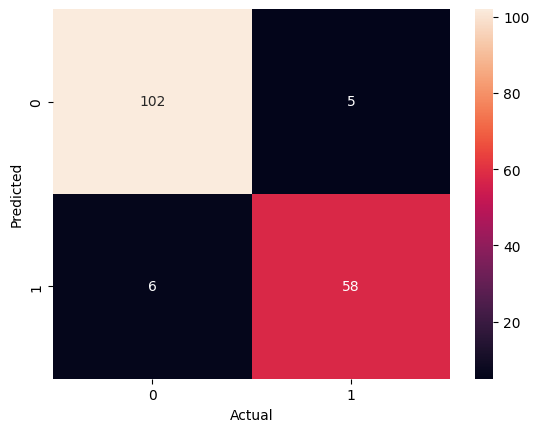

<Figure size 640x480 with 0 Axes>

In [16]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
plt.savefig("confusion_matrix.png")


Accuracy Score

In [17]:
print(accuracy_score(y_test,y_pred))

0.935672514619883


Classification Report

In [18]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           2       0.95      0.94      0.95       108
           4       0.91      0.92      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

